# *1) - Library*

In [67]:
# ==============================================
import warnings
warnings.filterwarnings('ignore')
# ==============================================
# Mathematical Calculations
import numpy as np
# Process & Clean Data
import pandas as pd
# Drawing Data in graphs
import matplotlib.pyplot as plt
import seaborn as sns
# ==============================================
# ==============================================
## Preprocessing & ML Algorithm
# ==> Preprocessing 
from sklearn.preprocessing import LabelEncoder,RobustScaler,PowerTransformer
# ==> Split Data 
from sklearn.model_selection import train_test_split
# ==> Machine Learning Algorithm 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# ==> Metrics Score
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

## ====================================================

## ====================================================

# *2) - Data Preparation*

## *Data Exploration* 

In [68]:
# Read Data
data = pd.read_csv(r'heart.csv')
df = data.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
# Size of data
df.shape

(918, 12)

In [70]:
# Information Of Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [71]:
# Statistics for Numbers Data Only
# ==> 7 column (dtypes { float64(1) + int64(6)} )
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### ========================================================

## *Check is Null* 

In [72]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

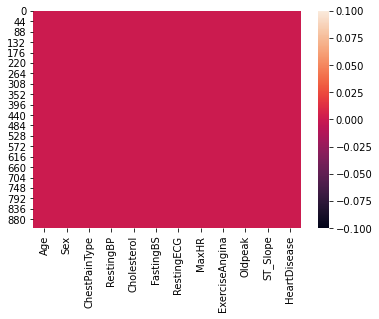

In [73]:
sns.heatmap(df.isnull());

### ========================================================

## *Check is Duplicated* 

In [74]:
# df.duplicated() ===> for each row
df.duplicated().sum() # for All data

0

### ========================================================

## *Data Analysis* 

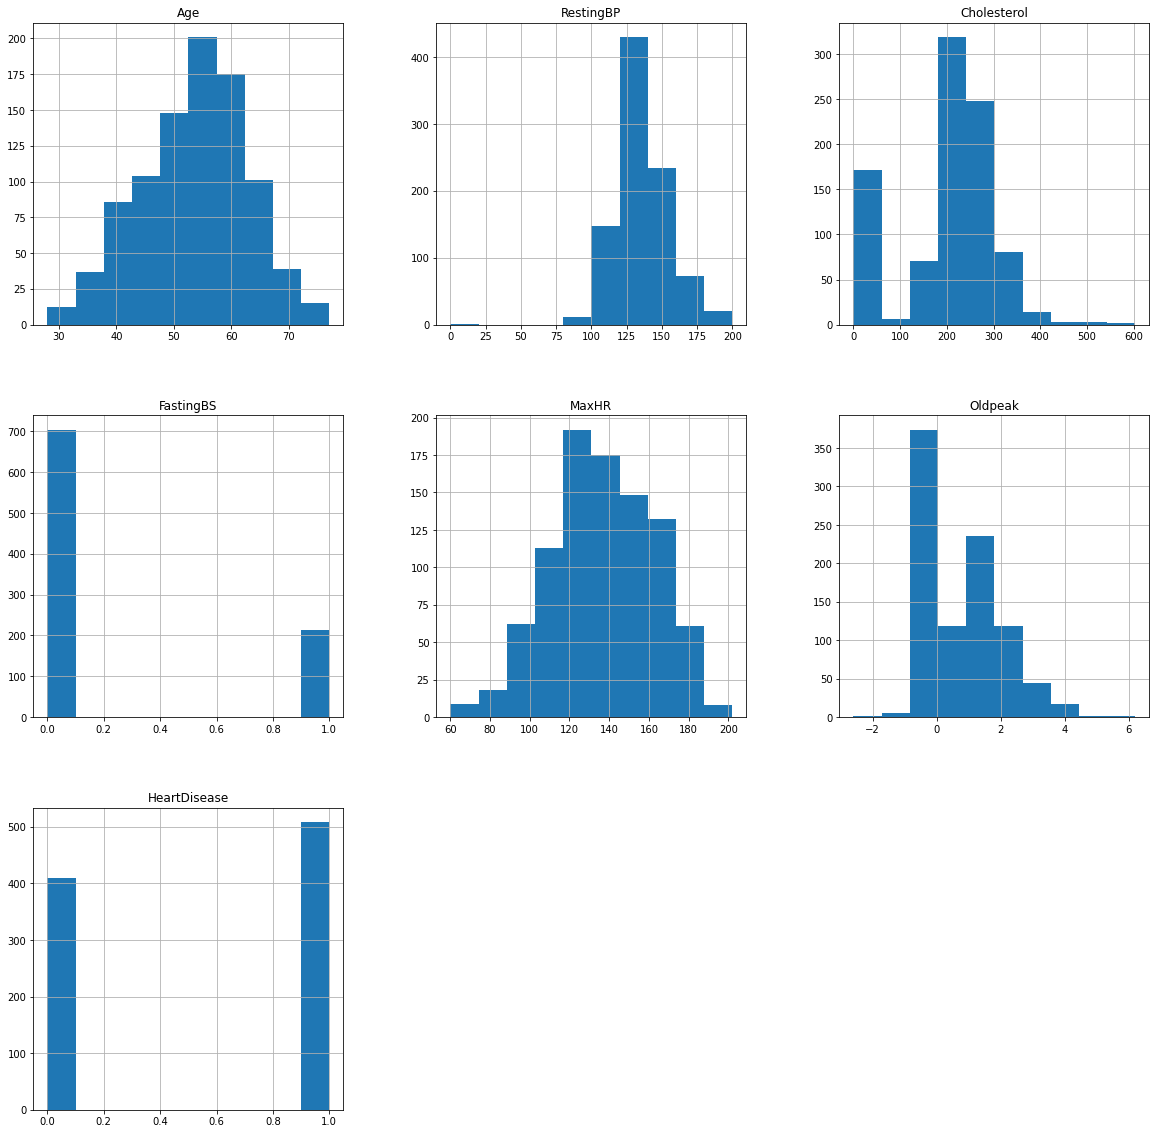

In [75]:
# Show Data In Figure Size
df.hist(figsize=(20,20));

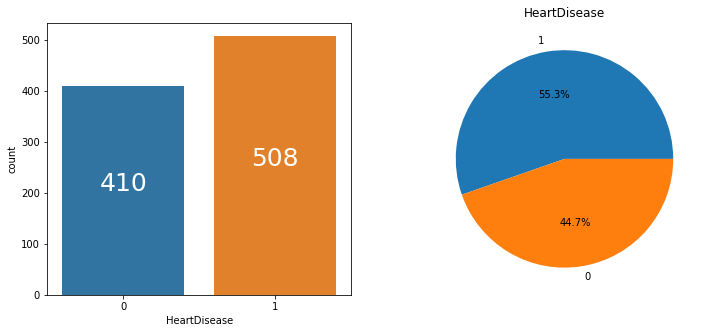

In [76]:
# Value Count For Output data
# =====================================================
## show figure of data
fig , axs = plt.subplots(1,2,figsize=(12, 5))
# =====================================================
ax_draw_value = sns.countplot(x='HeartDisease',data=df,ax= axs[0])
for p in ax_draw_value.patches:
    ax_draw_value.text(p.get_x()+p.get_width()/2, p.get_height()/2, str(p.get_height()), 
            ha='center', color='w', size=25)
# =====================================================
df['HeartDisease'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
axs[1].set_title('HeartDisease')
axs[1].set_ylabel('');

### ========================================================

### Correlation

<AxesSubplot: >

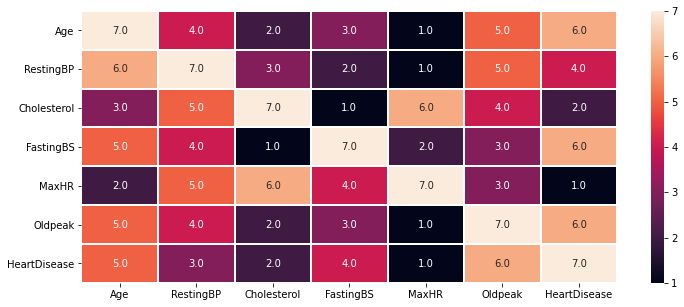

In [77]:
# Relation Between Columns
cor = df.corr(numeric_only = True)
plt.figure(figsize=(12, 5))
sns.heatmap(cor.rank(axis = 'columns') , annot=True , fmt = '.1f',linewidth = 1.5)

### ========================================================

### Skewness

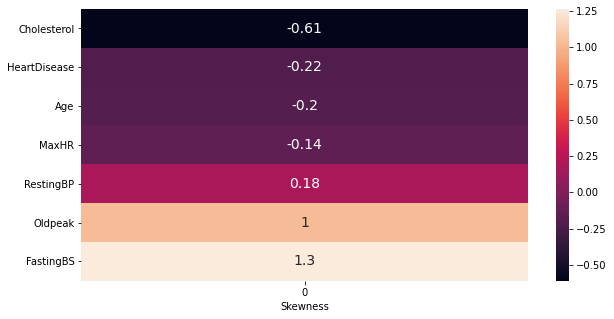

In [78]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(df.select_dtypes(exclude='object').skew().sort_values(ascending=True))
            ,annot=True,annot_kws={'fontsize': 14})
plt.xlabel('Skewness')
plt.show()

### ========================================================

### Visualization For Data

In [79]:
# A function to plot KDE plot, boxplot of a numerical feature in a dataframe.
def plots_num_column(feature, df):
    
    plt.figure(figsize=(15, 4))
   
    plt.subplot(1, 2, 1)
    plt.title('KDE Plot', fontsize=15)
    sns.kdeplot(df[feature], fill=True, color='#9467bd')
    
    plt.subplot(1, 2, 2)
    plt.title('Boxplot', fontsize=15)
    sns.boxplot(x=df[feature], palette=['#ff9896'])
    
    plt.tight_layout()
    plt.show()
# =====================================================
# =====================================================
def plot_box_and_hist(data, column_name, palette="Set1"):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df["HeartDisease"].map({0: "normal", 1: "heart disease"}), 
                y=column_name, data=df, palette=palette)
    
    plt.title(f"Box Plot of {column_name} by heart disease")

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column_name,palette=palette, kde=True,
                 hue=df["HeartDisease"].map({0: "Normal", 1: "heart disease"}))
    plt.title(f"Histogram of {column_name} by heart disease")

    plt.tight_layout()
    plt.show()

#### Cholesterol Distribution

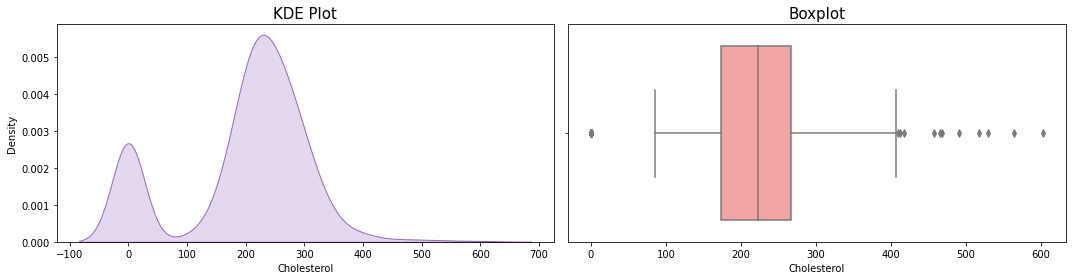

In [80]:
plots_num_column('Cholesterol',df)

#### Cholesterol and Heart Disease

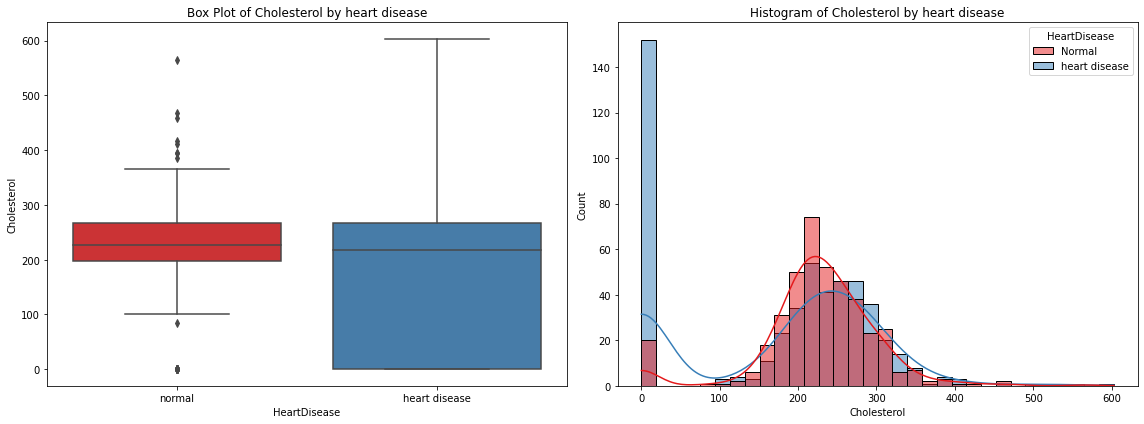

In [81]:
plot_box_and_hist(df,"Cholesterol")

#### Age Distribution

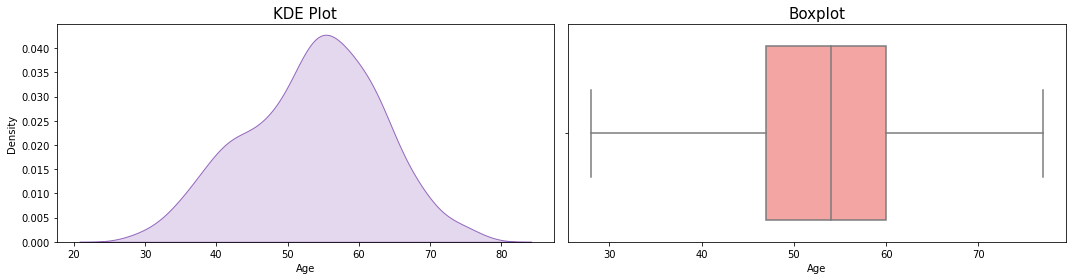

In [82]:
plots_num_column('Age',df)

#### Age and Heart Disease

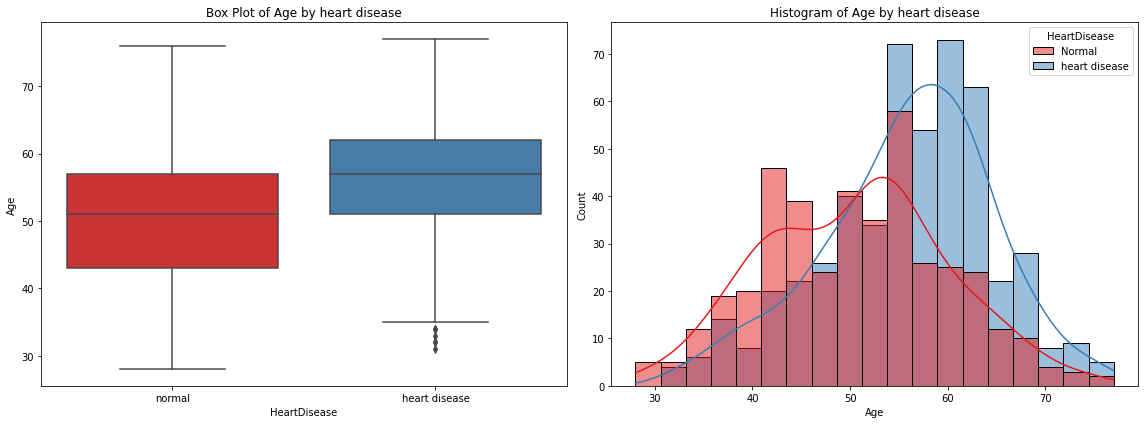

In [83]:
plot_box_and_hist(df,"Age")

#### RestingBP Distribution

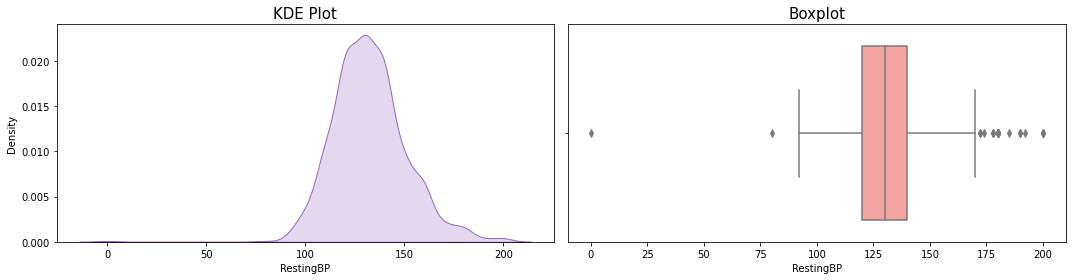

In [84]:
plots_num_column('RestingBP',df)

#### 📊 Resting Blood Pressure Insights

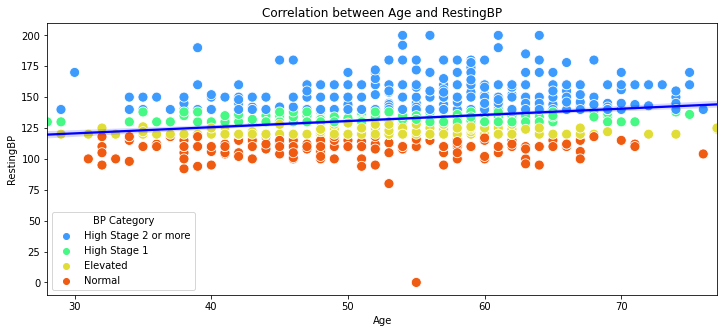

In [85]:
# Define a function to categorize RestingBP as normal or abnormal
def categorize_restingbp(bp):
    if bp < 120:
        return 'Normal'
    elif 120 <= bp < 130:
        return 'Elevated'
    elif 130 <= bp < 140:
        return 'High Stage 1'
    else:
        return 'High Stage 2 or more'

df['BP_Category'] = df['RestingBP'].apply(categorize_restingbp)

# Plotting with categories
plt.figure(figsize=(12, 5))

sns.scatterplot(x='Age', y='RestingBP', hue='BP_Category', palette='turbo', data=df, s=100)
sns.regplot(x='Age', y='RestingBP', data=df, scatter=False, color='blue')  

plt.title('Correlation between Age and RestingBP' )
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.legend(title='BP Category')
plt.show()

#### MaxHR Distribution

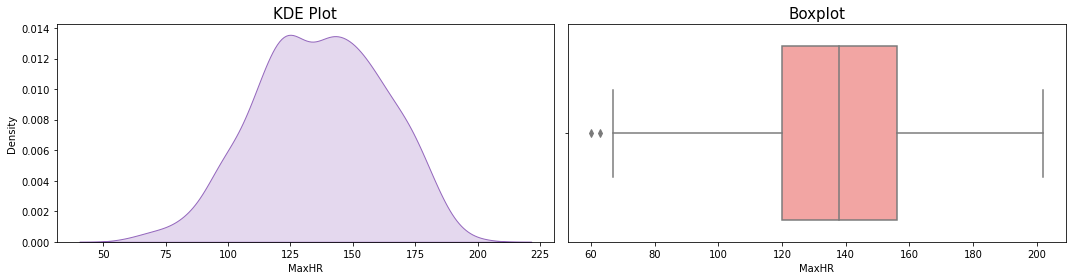

In [86]:
plots_num_column('MaxHR',df)

#### MaxHR Trends by Age 

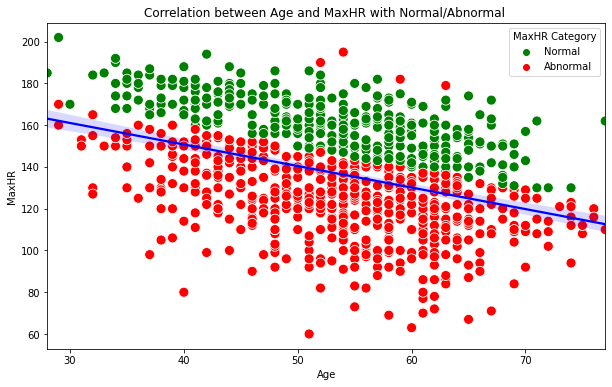

In [87]:
def categorize_maxhr(row):
    expected_maxhr = 220 - row['Age'] # The MaxHR ==> It's calculated as 220 minus your age.
    if abs(row['MaxHR'] - expected_maxhr) <= 20:  # Within 20 bpm of expected MaxHR
        return 'Normal'
    else:
        return 'Abnormal'
df['Category'] = df.apply(categorize_maxhr, axis=1)

# Plotting
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Age', y='MaxHR', hue='Category', palette={'Normal': 'green', 'Abnormal': 'red'}, data= df, s=100)
sns.regplot(x='Age', y='MaxHR', data=df, scatter=False, color='blue')

plt.title('Correlation between Age and MaxHR with Normal/Abnormal ')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend(title='MaxHR Category')
plt.show()

#### Plotting each categorical feature

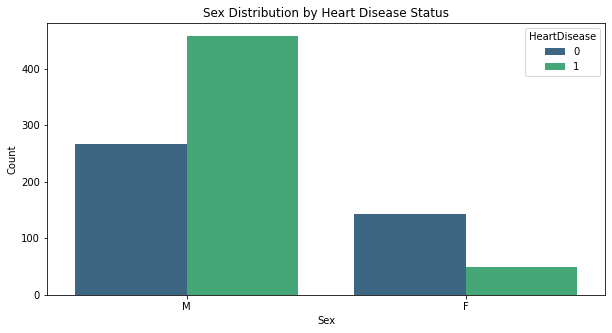

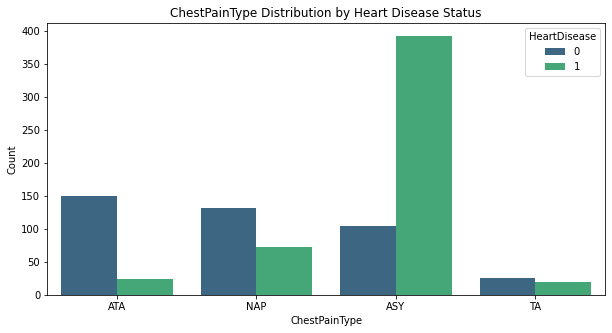

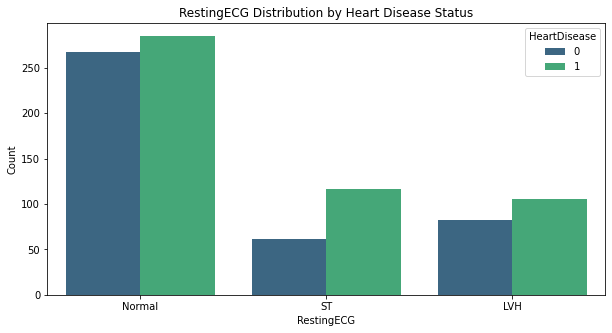

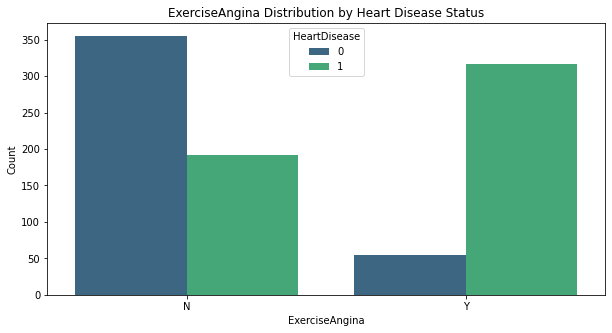

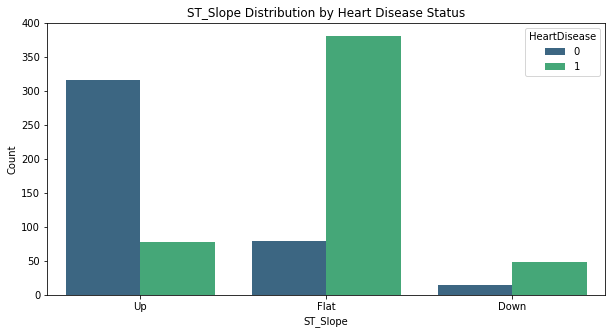

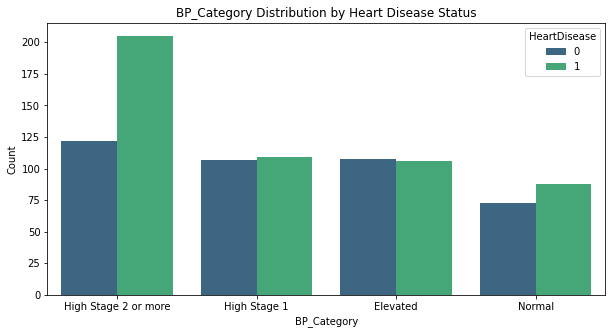

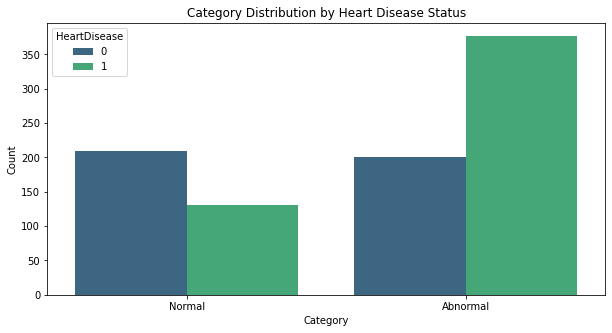

In [88]:
# Separate Data
numeric_obj = df.select_dtypes(exclude='object')
categorical_obj = df.select_dtypes(include='object')

df['HeartDisease'] = df['HeartDisease'].astype(str)
for feature in categorical_obj:
    df[feature] = df[feature].astype(str)

for feature in categorical_obj:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='HeartDisease', palette='viridis')
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### ======================================================================

### ======================================================================

### *Data Preprocessing*

In [154]:
# Split Data to { Train & Test}
x = data.drop(['HeartDisease'] , axis = 1)
y = data['HeartDisease']
# ===================================
print('** Train Data **\n')
print(x.head())
print('\n==========================================\n')
print('** Test Data **\n')
print(y.head())

** Train Data **

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              N      1.0     Flat  
2              N      0.0       Up  
3              Y      1.5     Flat  
4              N      0.0       Up  


** Test Data **

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64


In [165]:
import joblib
## Processing Data ==> [convert object Data to numeric data]
lab = LabelEncoder() 
# ===================================
for i in range(0,x.shape[1]):
    x.iloc[:,i] = lab.fit_transform(x.iloc[:,i])

### Data Clean

In [29]:
# Remove outliers
r_outliers = RobustScaler()
data_r_outliers = r_outliers.fit_transform(x)
print(data_r_outliers.shape)

(918, 11)


In [30]:
# Skewness Corrector
c_skewness = PowerTransformer()
numeric_Data_after_clean = c_skewness.fit_transform(data_r_outliers)
print(numeric_Data_after_clean.shape)

(918, 11)


In [31]:
# Split Data 
x_train , x_test , y_train , y_test = train_test_split(numeric_Data_after_clean , y , train_size =.8)
# =============================
print('Train Data')
print(x_train.shape)
print(y_train.shape)
print('\nTest Data')
print(x_test.shape)
print(y_test.shape)

Train Data
(734, 11)
(734,)

Test Data
(184, 11)
(184,)


### ======================================================================

## Machine Learning Model

In [32]:
# Model Bulid
def all_train_Algorithm(model):
    model.fit(x_train,y_train)

    predict_model = model.predict(x_test)
    # Print accuracy
    accuracy = accuracy_score(y_test, predict_model)
    print(f'Accuracy: {accuracy:.2f}')
    
    cm_design(y_test,predict_model)
    
#     print(confusion_matrix(y_test,predict_model))
    print(classification_report(y_test,predict_model))

In [33]:
def cm_design(y_test,predict_model):
        cm = confusion_matrix(y_test,predict_model)
        sns.heatmap(cm, 
                    annot=True,
                    fmt='g', 
                    xticklabels=['Infected' , 'Uninfected'],
                    yticklabels=['Infected' , 'Uninfected'])
        plt.xlabel('Prediction',fontsize=13)
        plt.ylabel('Actual',fontsize=13)
        plt.title('Confusion Matrix',fontsize=17)
        plt.show()

Accuracy: 0.91


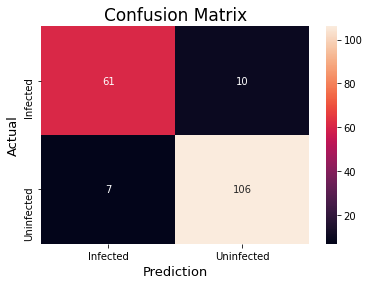

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        71
           1       0.91      0.94      0.93       113

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [639]:
## NN Design
model1 = MLPClassifier(hidden_layer_sizes = (64,),activation='relu',
                    solver='adam',alpha=0.0001,max_iter = 200)
all_train_Algorithm(model1)

Accuracy: 0.87


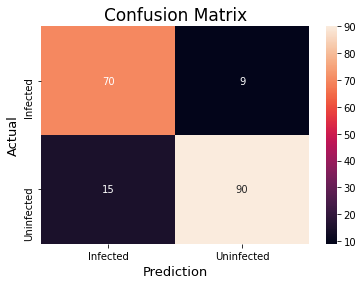

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        79
           1       0.91      0.86      0.88       105

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [345]:
# Support Vector Machine
model2 = SVC(kernel='rbf')
all_train_Algorithm(model2)

### ======================================================================

#### Save Model

In [654]:
import pickle 
# save the model 
filename = 'Heart Failure Classification.sav'
pickle.dump(model1, open(filename, 'wb')) 

#### Test Load Model`

In [164]:
import pickle 
# load the model 
load_model = pickle.load(open("Heart Failure Classification.sav", 'rb')) 
  
y_pred = load_model.predict(x_test) 
print('Accuracy : ', np.sqrt(accuracy_score(y_test, y_pred)))

Accuracy :  0.9440891630699332
